# Synthetic Financial Datasets For Fraud Detection


## Synthetic Financial Datasets : An Overview

Ever since the advent of internet the digital revolution has rising and has creeped into all aspects to our lives. One of the most important digital revolution happend in financial system and especially transacting money to someone from any part of the world digitally. Digital transactions have become a part of daily life like purchasing a product online, sending money to friends, depositing cash in bank account, investment purposes etc., They had a lot of benefits so does paved way for fradulent activities. People started using digital money transactions medium to launder money and make the money look like it comes from a legal source. This dataset (https://www.kaggle.com/ealaxi/paysim1) is presently only one of four on Kaggle with information on the rising risk of digital financial fraud, emphasizing the difficulty in obtaining such data.

## Problem statement


The main technical challenge it poses to predicting fraud is the highly imbalanced distribution between positive and negative classes in 6 million rows of data. Another stumbling block to the utility of this data stems from the possible discrepancies in its description.



## Headers


* **step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).


* **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.


* **amount** - amount of the transaction in local currency.


* **nameOrig** - customer who started the transaction


* **oldbalanceOrg** - initial balance before the transaction


* **newbalanceOrig** - new balance after the transaction


* **nameDest** - customer who is the recipient of the transaction


* **oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).


* **newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).


* **isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.


* **isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.


## Goals


* Exploratory analysis of data to extract the pattern of fraudlent activites.

* Build a machine learning model to classify fraud and non-fraud transactions.

* Reduce the false negatives by tuning the model.


In [76]:
%config InlineBackend.figure_format = "svg"

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,classification_report,roc_auc_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [78]:
df = pd.read_csv("/Users/nouf/Desktop/Synthetic-Financial-Datasets-For-Fraud-Detection/PS_20174392719_1491204439457_log.csv")

In [79]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [80]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [81]:
from sklearn.model_selection import train_test_split

df_sample, _ = train_test_split(df, test_size=0.92141601,random_state=1234, stratify=df["isFraud"])

In [82]:
df_train, df_test = train_test_split(df_sample, test_size=0.2,random_state=123,stratify=df_sample["isFraud"])
df_train, df_val = train_test_split(df_train, test_size=0.25,random_state=123,stratify=df_train["isFraud"])

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 486548 to 4214666
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            300000 non-null  int64  
 1   type            300000 non-null  object 
 2   amount          300000 non-null  float64
 3   nameOrig        300000 non-null  object 
 4   oldbalanceOrg   300000 non-null  float64
 5   newbalanceOrig  300000 non-null  float64
 6   nameDest        300000 non-null  object 
 7   oldbalanceDest  300000 non-null  float64
 8   newbalanceDest  300000 non-null  float64
 9   isFraud         300000 non-null  int64  
 10  isFlaggedFraud  300000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 27.5+ MB


In [84]:
df_train.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [85]:
#Drop Duplicates
#df_train.drop_duplicates(keep=False, inplace=True)

In [86]:
df_train.shape

(300000, 11)

In [87]:
df_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
486548,19,PAYMENT,33688.88,C1607102420,0.0,0.00,M1498412788,0.00,0.00,0,0
5717510,398,CASH_OUT,425900.93,C444567143,16867.0,0.00,C845492994,149745.41,575646.34,0,0
1597387,156,PAYMENT,8471.67,C24524743,202415.0,193943.33,M2015857724,0.00,0.00,0,0
2758578,212,CASH_OUT,175655.64,C1947758025,0.0,0.00,C840858860,3393248.63,3568904.28,0,0
3122816,236,CASH_OUT,159605.73,C1961652135,30915.0,0.00,C1277221049,178107.79,337713.51,0,0
...,...,...,...,...,...,...,...,...,...,...,...
512163,20,CASH_OUT,77482.84,C623262460,0.0,0.00,C1672395017,264467.11,341949.95,0,0
826498,41,PAYMENT,18616.54,C459340122,0.0,0.00,M210111217,0.00,0.00,0,0
679287,36,CASH_IN,68840.71,C1154779678,21719.0,90559.71,C865525056,118626.79,49786.08,0,0
4740194,332,PAYMENT,690.03,C1398262268,0.0,0.00,M1920254214,0.00,0.00,0,0


In [88]:
df_train.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,300000.000000,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,300000.000000,300000.000000
mean,243.518963,1.797030e+05,8.336019e+05,8.549314e+05,1.097957e+06,1.221330e+06,0.001290,0.000003
std,141.901298,6.022078e+05,2.895000e+06,2.930307e+06,3.346001e+06,3.621448e+06,0.035893,0.001826
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.324180e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.426901e+04,1.392974e+04,0.000000e+00,1.305861e+05,2.120638e+05,0.000000,0.000000
75%,334.000000,2.077247e+05,1.068955e+05,1.439608e+05,9.426017e+05,1.111275e+06,0.000000,0.000000
max,742.000000,5.512957e+07,3.741827e+07,3.498450e+07,3.114049e+08,3.114929e+08,1.000000,1.000000


In [89]:
df_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
486548,19,PAYMENT,33688.88,C1607102420,0.0,0.00,M1498412788,0.00,0.00,0,0
5717510,398,CASH_OUT,425900.93,C444567143,16867.0,0.00,C845492994,149745.41,575646.34,0,0
1597387,156,PAYMENT,8471.67,C24524743,202415.0,193943.33,M2015857724,0.00,0.00,0,0
2758578,212,CASH_OUT,175655.64,C1947758025,0.0,0.00,C840858860,3393248.63,3568904.28,0,0
3122816,236,CASH_OUT,159605.73,C1961652135,30915.0,0.00,C1277221049,178107.79,337713.51,0,0
...,...,...,...,...,...,...,...,...,...,...,...
512163,20,CASH_OUT,77482.84,C623262460,0.0,0.00,C1672395017,264467.11,341949.95,0,0
826498,41,PAYMENT,18616.54,C459340122,0.0,0.00,M210111217,0.00,0.00,0,0
679287,36,CASH_IN,68840.71,C1154779678,21719.0,90559.71,C865525056,118626.79,49786.08,0,0
4740194,332,PAYMENT,690.03,C1398262268,0.0,0.00,M1920254214,0.00,0.00,0,0


# EDA

### 1 - isFraud

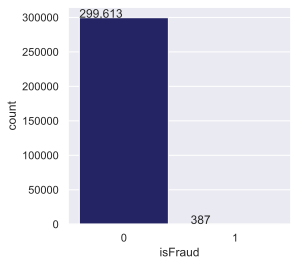

In [90]:
plt.figure(figsize=(4,4))
df_train['isFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFraud", data=df_train,color = "midnightblue" )
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')),
            (p.get_x(), p.get_height()))

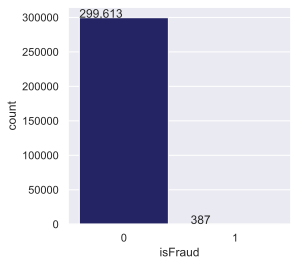

In [91]:
plt.figure(figsize=(4,4))
df_train['isFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFraud", data=df_train,color = "midnightblue" )
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')),
            (p.get_x(), p.get_height()))

### 2 - isFlaggedFraud

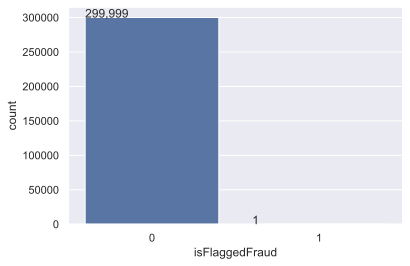

In [92]:
df_train['isFlaggedFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFlaggedFraud", data=df_train)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

### 3- type

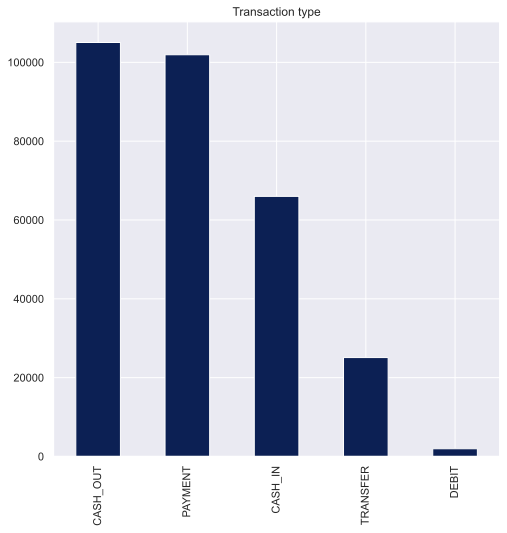

In [93]:
f, ax = plt.subplots(1, 1, figsize=(4, 4))
df_train.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8),color = "#0c2054")
plt.ticklabel_format(style='plain', axis='y')

In [94]:
pd.crosstab(df_train['type'], df_train['isFraud'])

isFraud,0,1
type,,
CASH_IN,65987,0
CASH_OUT,104850,192
DEBIT,1955,0
PAYMENT,101920,0
TRANSFER,24901,195


/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


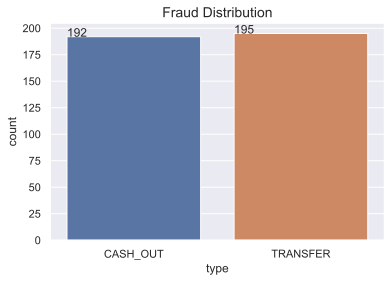

In [95]:
ax=sns.countplot('type', data=df_train[(df_train['isFraud'] == 1)])
plt.title('Fraud Distribution', fontsize=14)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

plt.show()

### 4 - step

In [124]:
fraud = df_train[df_train["isFraud"] == 1]
Notfraud = df_train[df_train["isFraud"] == 0]

In [125]:
Notfraud['transactionHour'] = Notfraud['step'] % 24
fraud['transactionHour'] = fraud['step'] % 24

<ipython-input-125-44805c4217b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Notfraud['transactionHour'] = Notfraud['step'] % 24
<ipython-input-125-44805c4217b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['transactionHour'] = fraud['step'] % 24


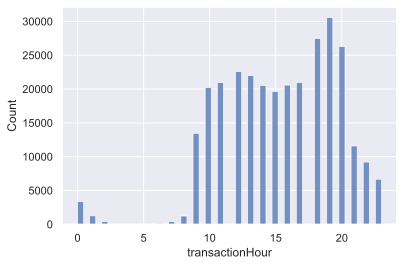

In [140]:
sns.histplot(data = Notfraud
            ,x = 'transactionHour'
            ,bins=50
            );

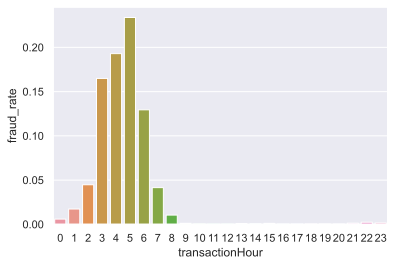

In [127]:
# transaction hour
df_train['transactionHour'] = df_train['step'] % 24

frauds_hour = pd.concat([df_train.groupby("transactionHour")["isFraud"].sum(),df_train.groupby("transactionHour")["isFraud"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
sns.barplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
plt.show()

In [22]:
# converting into object type
df_train['transactionHour'] = df_train['transactionHour'].astype('object')

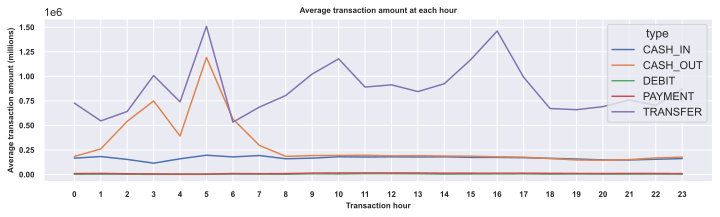

In [23]:
# avg. transaction amount at each hour for each transaction type
plt.figure(figsize=(12,3))
sns.lineplot(data=df_train.groupby(['transactionHour','type']).agg({'amount' : 'mean'}).round(2).reset_index(),
             x='transactionHour',
             y='amount',
             hue='type')
plt.xlabel('Transaction hour', fontsize=8, fontweight='bold')
plt.xticks(range(24), range(24),fontsize=8, fontweight='bold', rotation=0)
plt.ylabel('Average transaction amount (millions)', fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.title('Average transaction amount at each hour', fontsize=8, fontweight='bold')
plt.show()


--

# train 

In [12]:
#df_train = df_train.loc[(df_train.type == 'TRANSFER') | (df_train.type == 'CASH_OUT')]

In [356]:
df_train["errorbalanceOrg"] = df_train.newbalanceOrig + df_train.amount - df_train.oldbalanceOrg
df_train["errorbalanceDest"] = df_train.oldbalanceDest + df_train.amount - df_train.newbalanceDest

<ipython-input-356-d498e152ad0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["errorbalanceOrg"] = df_train.newbalanceOrig + df_train.amount - df_train.oldbalanceOrg
<ipython-input-356-d498e152ad0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["errorbalanceDest"] = df_train.oldbalanceDest + df_train.amount - df_train.newbalanceDest


In [357]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['type'], prefix='type')],axis=1) 

In [358]:
df_train = df_train.drop(['nameOrig', 'nameDest', 'isFlaggedFraud',"type","transactionHour"], axis = 1)

In [359]:
y_train = df_train["isFraud"]
X_train = df_train.drop(['isFraud'],axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
df = df_sample.copy() 
RF = RandomForestClassifier(random_state=1)

RF.fit(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig']], df[['isFraud']])

y_predict = RF.predict(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig']])

# evaluate the model
print(classification_report(df[['isFraud']], y_predict))
print(confusion_matrix(df[['isFraud']], y_predict))

<ipython-input-22-dc0706e003ca>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig']], df[['isFraud']])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    499356
           1       1.00      1.00      1.00       644

    accuracy                           1.00    500000
   macro avg       1.00      1.00      1.00    500000
weighted avg       1.00      1.00      1.00    500000

[[499356      0]
 [     0    644]]


In [25]:
df = df_sample.copy() 
RF = LogisticRegression(random_state=1)

RF.fit(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig']], df[['isFraud']])

y_predict = RF.predict(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig']])

# evaluate the model
print(classification_report(df[['isFraud']], y_predict))
print(confusion_matrix(df[['isFraud']], y_predict))

/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    499356
           1       0.41      0.45      0.43       644

    accuracy                           1.00    500000
   macro avg       0.70      0.73      0.71    500000
weighted avg       1.00      1.00      1.00    500000

[[498938    418]
 [   353    291]]


In [360]:
# from imblearn.over_sampling import SMOTE 

# sm = SMOTE(random_state=1234)

# X_train, y_train = sm.fit_sample(X_train, y_train)

In [361]:
#y_train.value_counts()

In [362]:
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorbalanceOrg,errorbalanceDest,type_CASH_OUT,type_TRANSFER
4085843,301,113641.78,205353.00,91711.22,104609.26,218251.04,0.00,-2.910383e-11,1,0
4401341,321,161589.53,0.00,0.00,1784202.09,1945791.62,161589.53,0.000000e+00,1,0
2265976,187,42560.85,0.00,0.00,449857.46,492418.30,42560.85,1.000000e-02,1,0
5363290,375,64884.37,0.00,0.00,387568.07,452452.44,64884.37,0.000000e+00,1,0
5109073,355,273942.84,0.00,0.00,664644.50,938587.34,273942.84,1.164153e-10,1,0
...,...,...,...,...,...,...,...,...,...,...
562309,22,210253.38,21643.57,0.00,793013.23,1003266.61,188609.81,0.000000e+00,1,0
4786567,345,31917.79,1416.00,0.00,0.00,31917.79,30501.79,0.000000e+00,1,0
1135233,131,346907.79,13273.00,0.00,5374581.04,6034793.78,333634.79,-3.133050e+05,1,0
3098884,235,188684.82,0.00,0.00,393013.10,581697.92,188684.82,-1.164153e-10,0,1


# Val

In [363]:
#df_val = df_val.loc[(df_val.type == 'TRANSFER') | (df_val.type == 'CASH_OUT')]

df_val["errorbalanceOrg"] = df_val.newbalanceOrig + df_val.amount - df_val.oldbalanceOrg
df_val["errorbalanceDest"] = df_val.oldbalanceDest + df_val.amount - df_val.newbalanceDest

df_val = pd.concat([df_val, pd.get_dummies(df_val['type'], prefix='type')],axis=1) 

df_val = df_val.drop(['nameOrig', 'nameDest', 'isFlaggedFraud',"type"], axis = 1)

In [364]:
y_val = df_val["isFraud"]
X_val= df_val.drop(['isFraud'],axis=1)

#t

In [365]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [366]:
from sklearn.neighbors import KNeighborsClassifier

In [367]:
from sklearn.svm import SVC

In [368]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [369]:
import imblearn

In [370]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 

In [371]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score,accuracy_score,f1_score,classification_report,precision_recall_curve,confusion_matrix

In [372]:
from sklearn.ensemble import GradientBoostingClassifier

In [373]:
X_val

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorbalanceOrg,errorbalanceDest,type_CASH_OUT,type_TRANSFER
2482831,204,141723.12,11489.0,0.00,127085.80,268808.91,130234.12,1.000000e-02,1,0
4875222,348,4240985.82,0.0,0.00,8993681.08,13234666.91,4240985.82,-1.000000e-02,0,1
6119262,538,263816.93,199754.0,0.00,0.00,263816.93,64062.93,0.000000e+00,1,0
4592592,328,120251.85,140252.0,20000.15,835509.63,955761.49,0.00,-1.000000e-02,1,0
4879790,348,77334.54,0.0,0.00,1052962.05,1130296.58,77334.54,1.000000e-02,1,0
...,...,...,...,...,...,...,...,...,...,...
4061431,300,72287.61,0.0,0.00,222985.19,295272.79,72287.61,1.000000e-02,1,0
4298194,307,7668.86,0.0,0.00,179595.88,187264.74,7668.86,0.000000e+00,1,0
1287844,135,1384304.52,9976.7,0.00,12558362.62,13942667.14,1374327.82,-1.862645e-09,0,1
724538,37,203914.75,263.0,0.00,198104.78,402019.53,203651.75,0.000000e+00,0,1


# Random Forest Classifier

In [374]:
RF = RandomForestClassifier(random_state=1)

RF.fit(X_train, y_train)

y_predict = RF.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86739
           1       1.00      1.00      1.00       250

    accuracy                           1.00     86989
   macro avg       1.00      1.00      1.00     86989
weighted avg       1.00      1.00      1.00     86989

[[86739     0]
 [    0   250]]


# Gradient Boosting Classifier

In [375]:
GBC = GradientBoostingClassifier()

GBC.fit(X_train, y_train)

y_predict = GBC.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86739
           1       1.00      0.34      0.50       250

    accuracy                           1.00     86989
   macro avg       1.00      0.67      0.75     86989
weighted avg       1.00      1.00      1.00     86989

[[86739     0]
 [  166    84]]


# Decision Tree Classifier

In [376]:
dtc = DecisionTreeClassifier(random_state=1)

dtc.fit(X_train, y_train)

y_predict = dtc.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86739
           1       0.99      1.00      0.99       250

    accuracy                           1.00     86989
   macro avg       1.00      1.00      1.00     86989
weighted avg       1.00      1.00      1.00     86989

[[86737     2]
 [    1   249]]


# Logistic Regression

In [377]:
Logg = LogisticRegression()

Logg.fit(X_train, y_train)

y_predict = Logg.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86739
           1       0.54      0.43      0.48       250

    accuracy                           1.00     86989
   macro avg       0.77      0.71      0.74     86989
weighted avg       1.00      1.00      1.00     86989

[[86646    93]
 [  143   107]]


# SMOTE  

In [378]:
y_train = df_train["isFraud"]
X_train = df_train.drop(['isFraud'],axis=1)

In [379]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=1)

X_train, y_train = sm.fit_sample(X_train, y_train)

In [380]:
y_train.value_counts()

1    260385
0    260385
Name: isFraud, dtype: int64

# Random Forest Classifier With SMOTE

In [381]:
RF = RandomForestClassifier(random_state=1)

RF.fit(X_train, y_train)

y_predict = RF.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86739
           1       0.98      1.00      0.99       250

    accuracy                           1.00     86989
   macro avg       0.99      1.00      0.99     86989
weighted avg       1.00      1.00      1.00     86989

[[86733     6]
 [    0   250]]


# Decision Tree Classifier With SMOTE

In [382]:
dtc = DecisionTreeClassifier(random_state=1)

dtc.fit(X_train, y_train)

y_predict = dtc.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86739
           1       0.95      1.00      0.97       250

    accuracy                           1.00     86989
   macro avg       0.97      1.00      0.99     86989
weighted avg       1.00      1.00      1.00     86989

[[86725    14]
 [    0   250]]


# Logistic Regression With SMOTE

In [383]:
Logg = LogisticRegression()

Logg.fit(X_train, y_train)

y_predict = Logg.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     86739
           1       0.03      0.98      0.06       250

    accuracy                           0.92     86989
   macro avg       0.52      0.95      0.51     86989
weighted avg       1.00      0.92      0.95     86989

[[79622  7117]
 [    4   246]]


# Gradient Boosting Classifier With SMOTE

In [384]:
dtc = GradientBoostingClassifier()

dtc.fit(X_train, y_train)

y_predict = dtc.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86739
           1       0.95      1.00      0.98       250

    accuracy                           1.00     86989
   macro avg       0.98      1.00      0.99     86989
weighted avg       1.00      1.00      1.00     86989

[[86727    12]
 [    0   250]]
